In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
!pip install pandas
import pandas as pd
import numpy as np

#### Load and Review data

In [3]:
df = pd.read_csv("pima-indians-diabetes.csv")

In [4]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Details of the data 

#### Preg: Number of pregnency each women had
#### Plas: Plasma glucose level 
#### Pres: Blood presure 
#### skin: Skin thikness
#### test: insuline test
#### mass: body mass index
#### pedi: diabetes pedegre function
#### age: age of the women
#### class: Women had diabetes or not

In [5]:
df.shape # 768 rows and 9 columns

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe(include="all")

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().values.any() # check for any null values in the dataset

False

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Quick look at the dataset: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc89f46d3d0>,
      dtype=object)

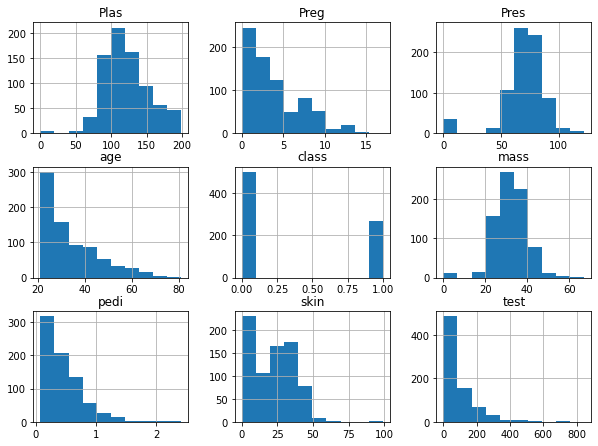

In [10]:
# plotting histogram
df.hist(figsize=(10,10), stacked=False,  layout=(4,3))

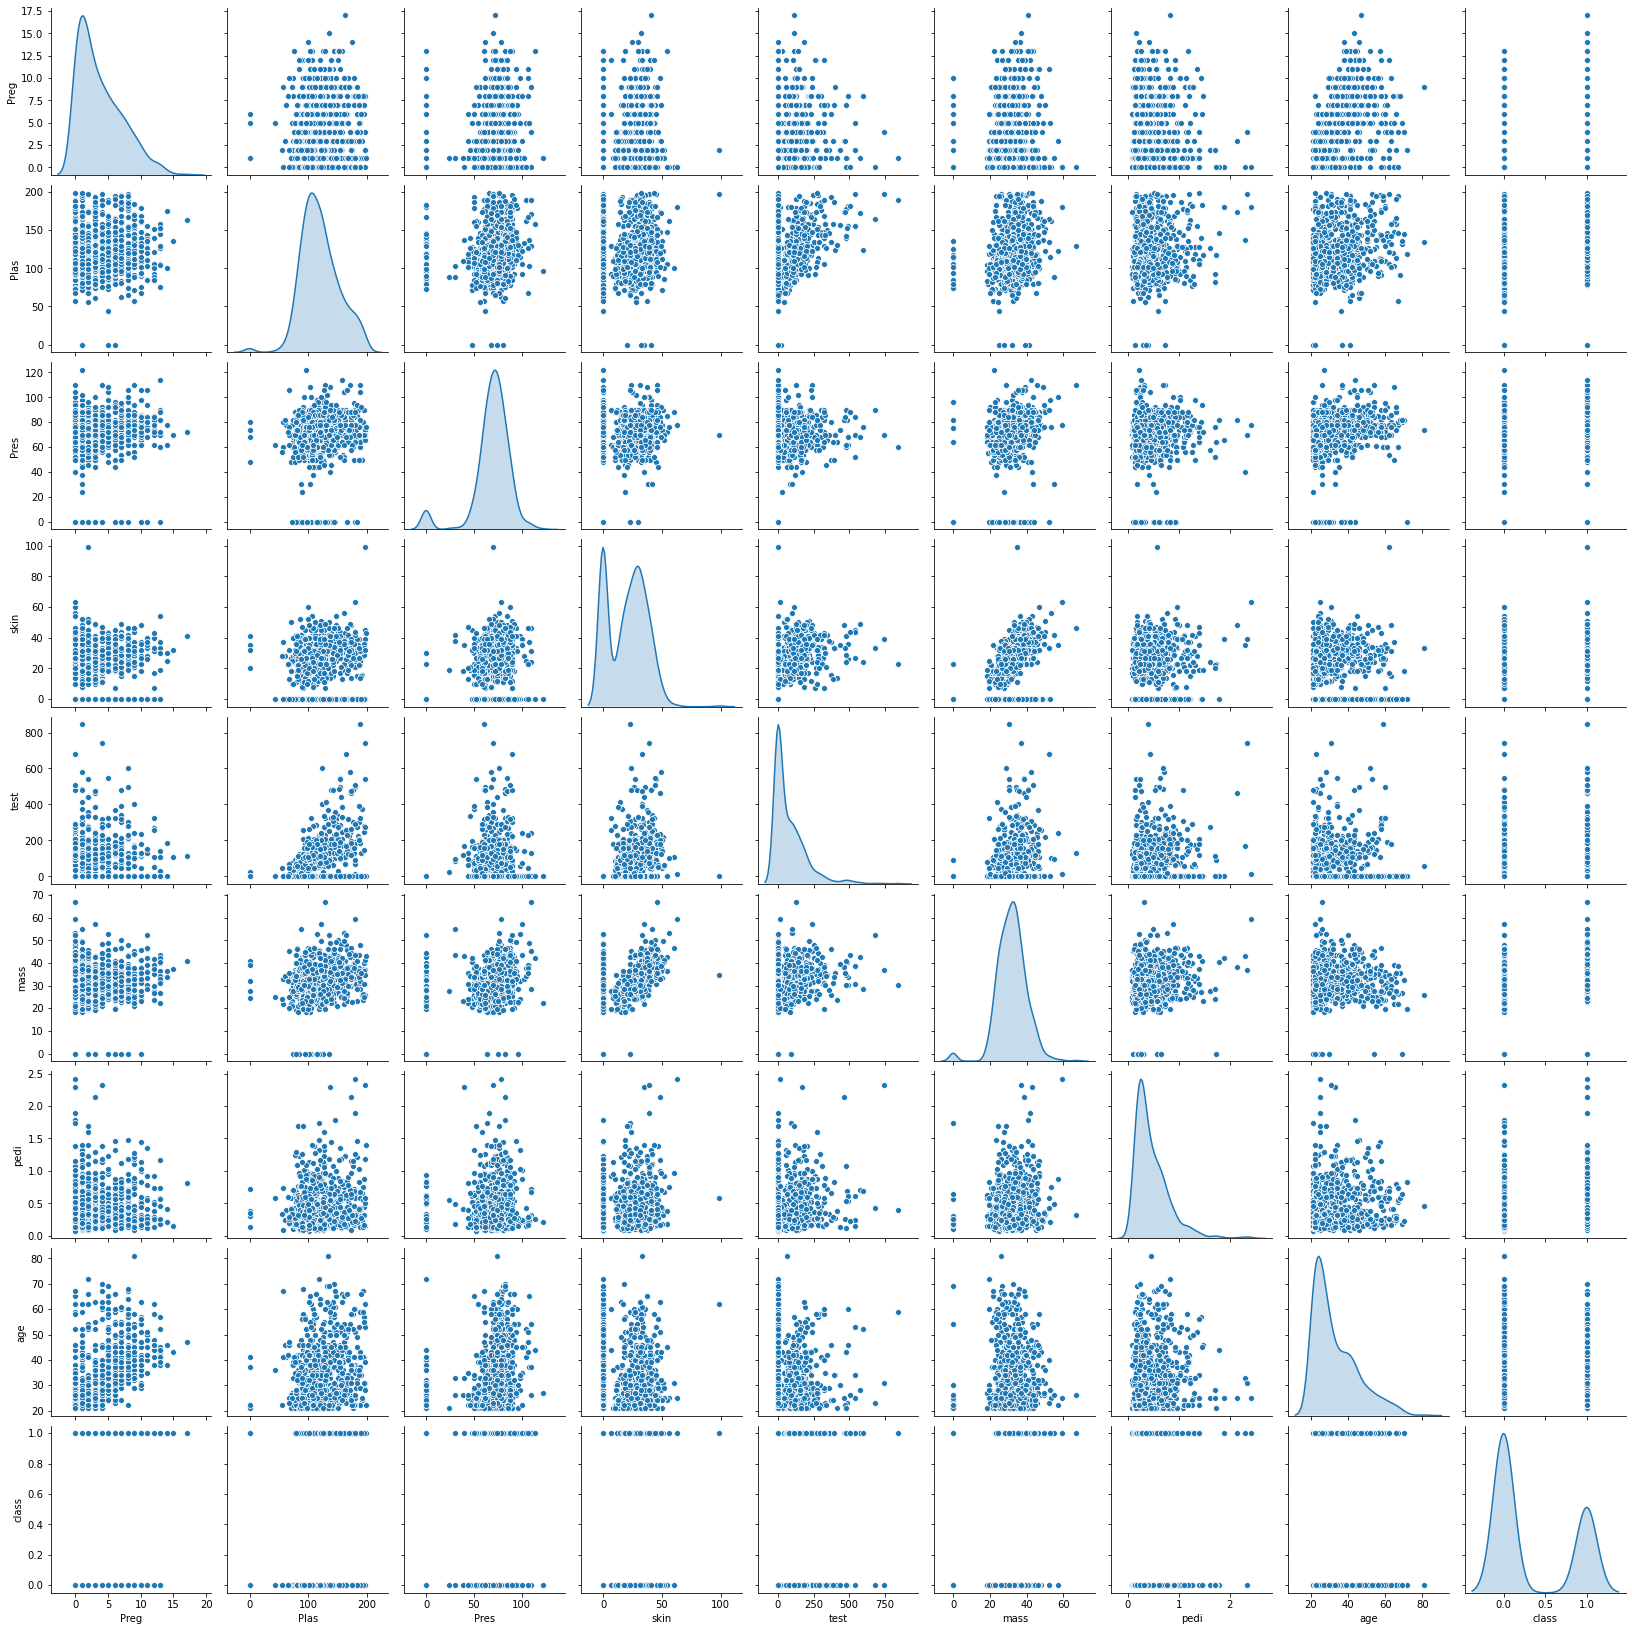

In [11]:
sns.pairplot(df, diag_kind='kde')

#### Heatmap 

In [12]:
plot_r = df.corr() # correlation matirix

In [13]:
def plot_corr(df, size=11):
    plot_r = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(plot_r)
    plt.xticks(range(len(plot_r.columns)), plot_r.columns)
    plt.yticks(range(len(plot_r.columns)), plot_r.columns)
    

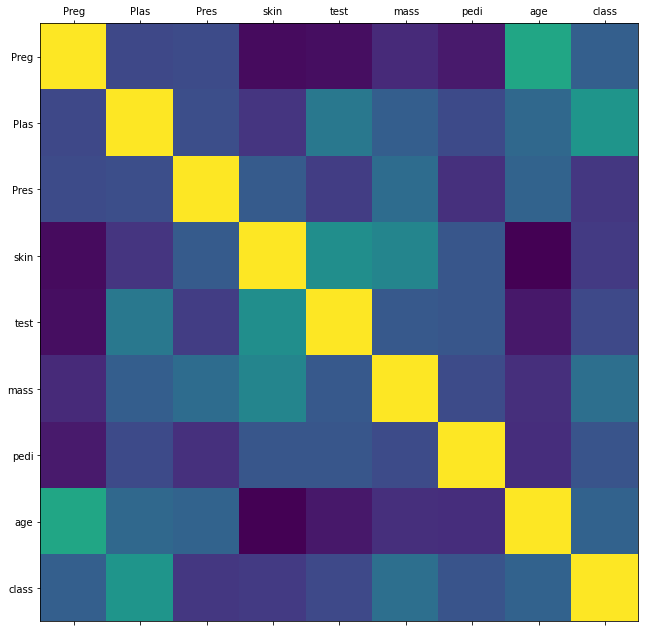

In [14]:
plot_corr(df)

#### Calculate diabetes ratio of True/False from outcome variable

In [15]:
true = len(df.loc[df['class'] == True])
false = len(df.loc[df['class'] == False])

In [16]:
p_true = (true, true / (true + false) * 100) # alternative method added below

In [17]:
p_false = (false, false/ (true + false) * 100) # alternative method added below

In [18]:
print(p_true,"%")
print(p_false, "%")

(268, 34.89583333333333) %
(500, 65.10416666666666) %


So we have 34.89% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes.

Its a good distribution True/False cases of diabetes in data.

#### Alternative method: 

In [19]:
print("Number of true cases: {0} ({1:2.2f}%)".format(true, (true / (true + false)) * 100 ))


Number of true cases: 268 (34.90%)


In [20]:
print("Number of true cases: {0} ({1:2.2f}%)".format(false, (false / (true + false)) * 100 ))


Number of true cases: 500 (65.10%)


So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes.

Its a good distribution True/False cases of diabetes in data.

### Spliting data

We will use 70% of data for training and 30% for testing.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop('class',axis=1)     
Y = df['class'] 

In [23]:
# print(Y)

In [24]:
 # print(X)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [37]:
X_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
138,0,129,80,0,0,31.2,0.703,29
762,9,89,62,0,0,22.5,0.142,33
717,10,94,72,18,0,23.1,0.595,56
155,7,152,88,44,0,50.0,0.337,36
261,3,141,0,0,0,30.0,0.761,27


In [38]:
Y_train.head()

138    0
762    0
717    0
155    1
261    1
Name: class, dtype: int64

#### Lets check split of data

In [39]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))


69.92% data is in training set
30.08% data is in test set


# Data Preparation

In [40]:
X_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
138,0,129,80,0,0,31.2,0.703,29
762,9,89,62,0,0,22.5,0.142,33
717,10,94,72,18,0,23.1,0.595,56
155,7,152,88,44,0,50.0,0.337,36
261,3,141,0,0,0,30.0,0.761,27


In [41]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values = 0, strategy = "mean")
# storing the column titles
cols = X_train.columns

# after transformation into new data frame, it will loose its column names
X_train = pd.DataFrame(rep_0.fit_transform(X_train))
X_test = pd.DataFrame(rep_0.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols

X_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,4.512821,129.0,80.000000,29.044386,159.603571,31.2,0.703,29.0
1,9.000000,89.0,62.000000,29.044386,159.603571,22.5,0.142,33.0
2,10.000000,94.0,72.000000,18.000000,159.603571,23.1,0.595,56.0
3,7.000000,152.0,88.000000,44.000000,159.603571,50.0,0.337,36.0
4,3.000000,141.0,71.928433,29.044386,159.603571,30.0,0.761,27.0


# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

# trained 100 times and best model accuracy will get saved
best = 0
for i in range(100):
    times = 0
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
    
    from sklearn.impute import SimpleImputer
    rep_0 = SimpleImputer(missing_values = 0, strategy = "mean")
    # storing the column titles
    cols = X_train.columns

    # after transformation into new data frame, it will loose its column names
    X_train = pd.DataFrame(rep_0.fit_transform(X_train))
    X_test = pd.DataFrame(rep_0.fit_transform(X_test))

    X_train.columns = cols
    X_test.columns = cols

#X_train.head()
    
    # fit the model
    logistic = LogisticRegression(solver="liblinear")
    logistic.fit(X_train, Y_train)
    
    acc = logistic.score(X_test, Y_test)
    # accuracy 
    times = times+1
    print(times)
    
    if acc>best:
        best = acc
        
print(best)

LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1


LogisticRegression(solver='liblinear')

1
0.8181818181818182
